## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [1]:
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
#1 Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
df = pd.read_csv('/home/vamshi/Downloads/Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
df['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [4]:
#2 Check the shape of the DataFrame (rows, columns)
df.shape

(545, 13)

In [5]:
#3 Look at the data types of the columns
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [6]:
#4 Check for missing  values if any, replace with appropriate values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [8]:
#5 Prepare  X (independent variables) and y (dependent variable)

y = df['price']
X = df.drop('price', axis=1)

In [9]:
type(X)

pandas.core.frame.DataFrame

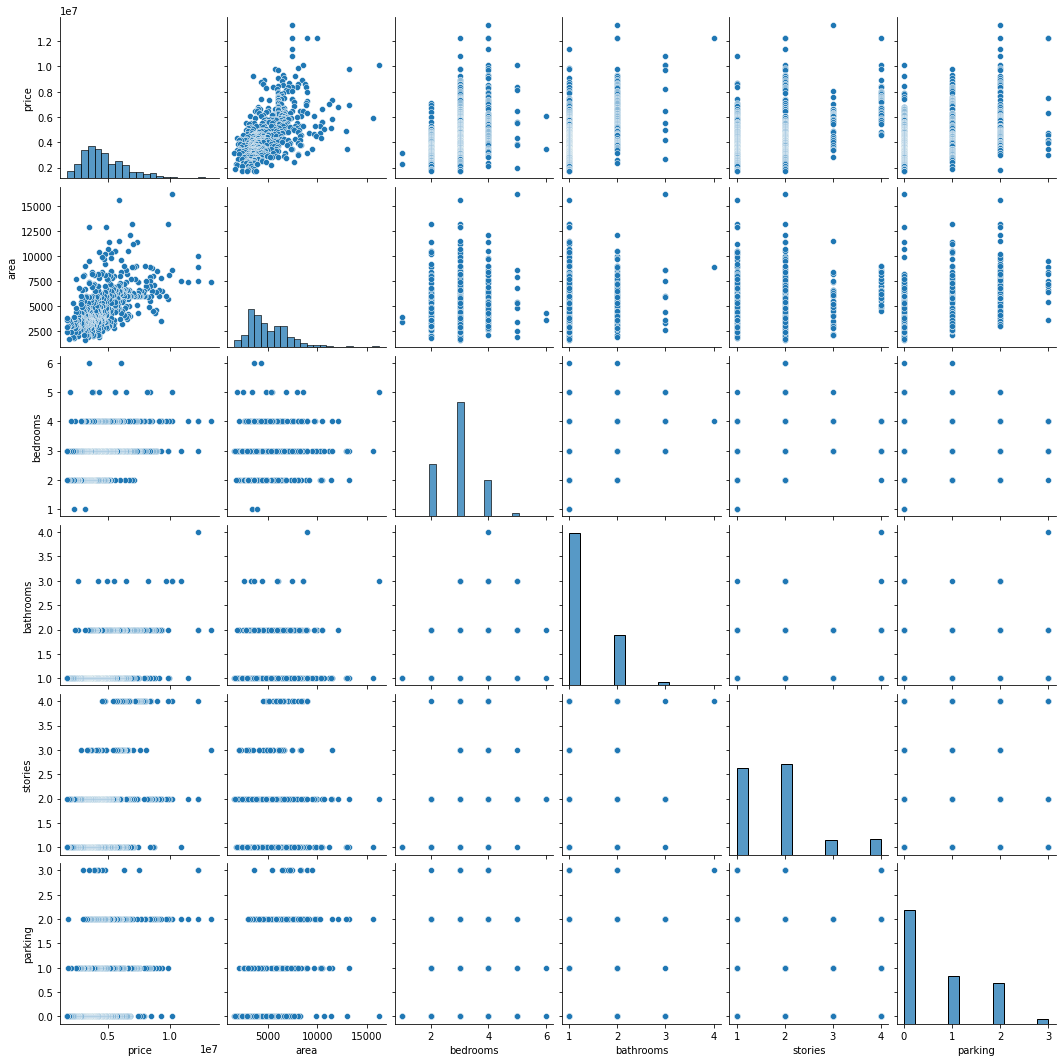

In [10]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots
sns.pairplot(df)

In [11]:
type(X)

pandas.core.frame.DataFrame

In [12]:
#7 Encoding categorical data in X

encoder = OneHotEncoder(sparse_output=False, drop='first')
for col in X.select_dtypes(include=['object']).columns:
    encoded_data = encoder.fit_transform(X[[col]])
    encoded_cols = encoder.get_feature_names_out([col])
    X.drop(col, axis=1, inplace=True)
    X = pd.concat([X, pd.DataFrame(encoded_data, columns=encoded_cols, index=X.index)], axis=1)

In [13]:
X.head(10)

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,8960,4,4,4,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,9960,3,2,2,2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,7500,4,2,2,3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,7420,4,1,2,2,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
5,7500,3,3,1,2,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
6,8580,4,3,4,2,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
7,16200,5,3,2,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,8100,4,1,2,2,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
9,5750,3,2,4,1,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0


In [14]:
#8  Avoiding the Dummy Variable Trap

In [15]:
#9 Apply feature scaling on numerical variables
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [16]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
#11 Fitting Multiple Linear Regression to the Training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
#12 Predict on the train set and calculate the error = y_pred - y_train
y_pred = model.predict(X_train)

In [19]:
errors = y_pred-y_train

In [20]:
print(model.intercept_)
print(model.coef_)

4792156.294831953
[ 549164.54164962   59649.5044      559614.4809304   361644.23977858
  260916.61906937  142138.05665122  105458.53398452  230256.71227242
  128949.74488419  318745.84585518  215853.03406393  -59972.42451317
 -183457.57682265]


<Axes: ylabel='price'>

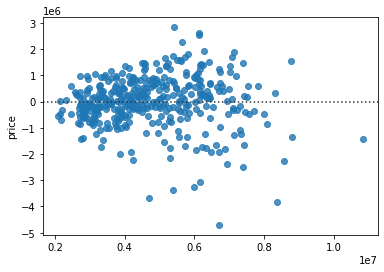

In [21]:
#13  Residual plot - plot y_pred in x axis and errors in y axis
sns.residplot(data=df, x=y_pred, y=errors)

In [22]:
#14  Predic on the test set
y_pred = model.predict(X_test)
errors = y_pred-y_test

<Axes: ylabel='price'>

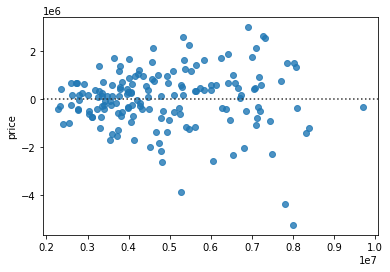

In [23]:
#15 Residual plot - plot y_pred in x axis and errors in y axis
sns.residplot(data=df, x=y_pred, y=errors)

In [24]:
#16 Print Mean Squared Error and R Squared Value
from sklearn.metrics import mean_squared_error, r2_score

# Assuming y_test are the true values and y_pred are your model's predictions:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R Squared Value (R²):", r2)

Mean Squared Error (MSE): 1523019469501.2913
R Squared Value (R²): 0.6463350878895877


In [26]:
#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)
n = len(y_test)           # number of observations
p = X_test.shape[1]       # number of features

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R Squared Value:", adjusted_r2)

Adjusted R Squared Value: 0.6156841288400186
